# Project Loan Default Prediction

In [76]:
#All Libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#skitlearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#depois verificar se usámos tudo


In [77]:
#Import Dataset
df = pd.read_csv('loan_default_prediction.csv')
#print(df.columns)
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [78]:
#remover variáveis que a priori não fazem sentido; ver relatorio para justificações
df=df.drop(['ID','GGGrade','Validation','Designation','Debt_to_Income','Postal_Code','Deprecatory_Records',\
            'Inquiries','Gross_Collection','Sub_GGGrade','Total_Unpaid_CL','File_Status'],axis=1)
print(df.columns)

Index(['Asst_Reg', 'Experience', 'Yearly_Income', 'Home_Status',
       'Unpaid_2_years', 'Already_Defaulted', 'Lend_Amount',
       'Interest_Charged', 'Usage_Rate', 'Present_Balance', 'State',
       'Account_Open', 'Duration', 'Unpaid_Amount', 'Reason', 'Claim_Type',
       'Due_Fee', 'Default'],
      dtype='object')


In [79]:
#VER SE VARIAVEL NUMERICA TEM ALGUM STRING
df['Default'].value_counts()/df.shape[0] #quantos defaults temos
#print(df[df['Default']==1]['Default'].value_counts())

0    0.811291
1    0.188709
Name: Default, dtype: float64

In [80]:
#Conversão dos anos de experiencia para númerico
df['Experience']=df['Experience'].apply(lambda i: 10 if i[0:1]=='>' else 1 if i[0:1]=='<' else int(i[0:1]))
#Conversão da duração para númerico
df['Duration']=df['Duration'].apply(lambda i : i.replace(' years','')).astype(int)
#ver resultado
df.head()

,Asst_Reg,Experience,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,State,Account_Open,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,421802,10,633600.00,MORTGAGE,0,0,42023.25,15.39,88.924,607161.90,California,17,3,31216.05,debt consolidation,I,0.0,0
1,3964312,7,85483.20,RENT,0,0,38133.00,9.94,102.856,269234.06,NC,15,5,11660.49,debt consolidation,I,0.0,0
2,4247560,1,79200.00,RENT,0,0,17100.00,22.35,60.372,22476.53,Florida,7,5,5637.87,major purchase,I,0.0,0
3,197179,1,61600.00,RENT,0,0,5130.00,10.36,116.272,15242.09,NewJersey,9,3,15607.17,major purchase,I,0.0,1
4,4646684,2,68053.92,RENT,0,0,19665.00,13.68,127.280,65433.94,LA,10,5,27472.86,debt consolidation,I,0.0,0


In [81]:
#ver dimensão atual da base
df.shape

(87500, 18)

In [83]:
#ver elementos nulos do dataset em %
display(df.isnull().sum()/df.shape[0])
#info
df.info()

Asst_Reg             0.000000
Experience           0.000000
Yearly_Income        0.063714
Home_Status          0.000000
Unpaid_2_years       0.000000
Already_Defaulted    0.000000
Lend_Amount          0.000000
Interest_Charged     0.000000
Usage_Rate           0.000000
Present_Balance      0.000000
State                0.000000
Account_Open         0.000000
Duration             0.000000
Unpaid_Amount        0.055451
Reason               0.000000
Claim_Type           0.000000
Due_Fee              0.000000
Default              0.000000
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Asst_Reg           87500 non-null  int64  
 1   Experience         87500 non-null  int64  
 2   Yearly_Income      81925 non-null  float64
 3   Home_Status        87500 non-null  object 
 4   Unpaid_2_years     87500 non-null  int64  
 5   Already_Defaulted  87500 non-null  int64  
 6   Lend_Amount        87500 non-null  float64
 7   Interest_Charged   87500 non-null  float64
 8   Usage_Rate         87500 non-null  float64
 9   Present_Balance    87500 non-null  float64
 10  State              87500 non-null  object 
 11  Account_Open       87500 non-null  int64  
 12  Duration           87500 non-null  int64  
 13  Unpaid_Amount      82648 non-null  float64
 14  Reason             87500 non-null  object 
 15  Claim_Type         87500 non-null  object 
 16  Due_Fee            875

In [84]:
#eliminar observações com pelo menos uma feature sem valores
df=df.dropna()
df.isnull().sum()
display(df.shape)
#drop duplicates
df.drop_duplicates()
df.shape

(77376, 18)

In [85]:
#DATA FRAME COM VARIÁVEIS CONTINUAS
vnumcont=['Asst_Reg','Experience','Yearly_Income','Lend_Amount','Interest_Charged','Usage_Rate','Present_Balance',\
            'Due_Fee','Unpaid_Amount']
numcont=df[vnumcont]
#vale a pena ter duratio como continua?
numcont

,Asst_Reg,Experience,Yearly_Income,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Due_Fee,Unpaid_Amount
0,421802,10,633600.00,42023.25,15.39,88.924,607161.90,0.0,31216.05
1,3964312,7,85483.20,38133.00,9.94,102.856,269234.06,0.0,11660.49
2,4247560,1,79200.00,17100.00,22.35,60.372,22476.53,0.0,5637.87
3,197179,1,61600.00,5130.00,10.36,116.272,15242.09,0.0,15607.17
4,4646684,2,68053.92,19665.00,13.68,127.280,65433.94,0.0,27472.86
...,...,...,...,...,...,...,...,...,...
87494,5409793,1,246400.00,20520.00,12.62,87.720,350087.11,0.0,10383.12
87495,4535984,10,75680.00,10260.00,8.35,51.084,15100.14,0.0,10012.05
87496,2624710,3,90423.52,27360.00,24.18,129.172,102811.88,0.0,24921.54
87497,5966919,10,91520.00,8550.00,11.03,83.420,14584.11,0.0,14517.90


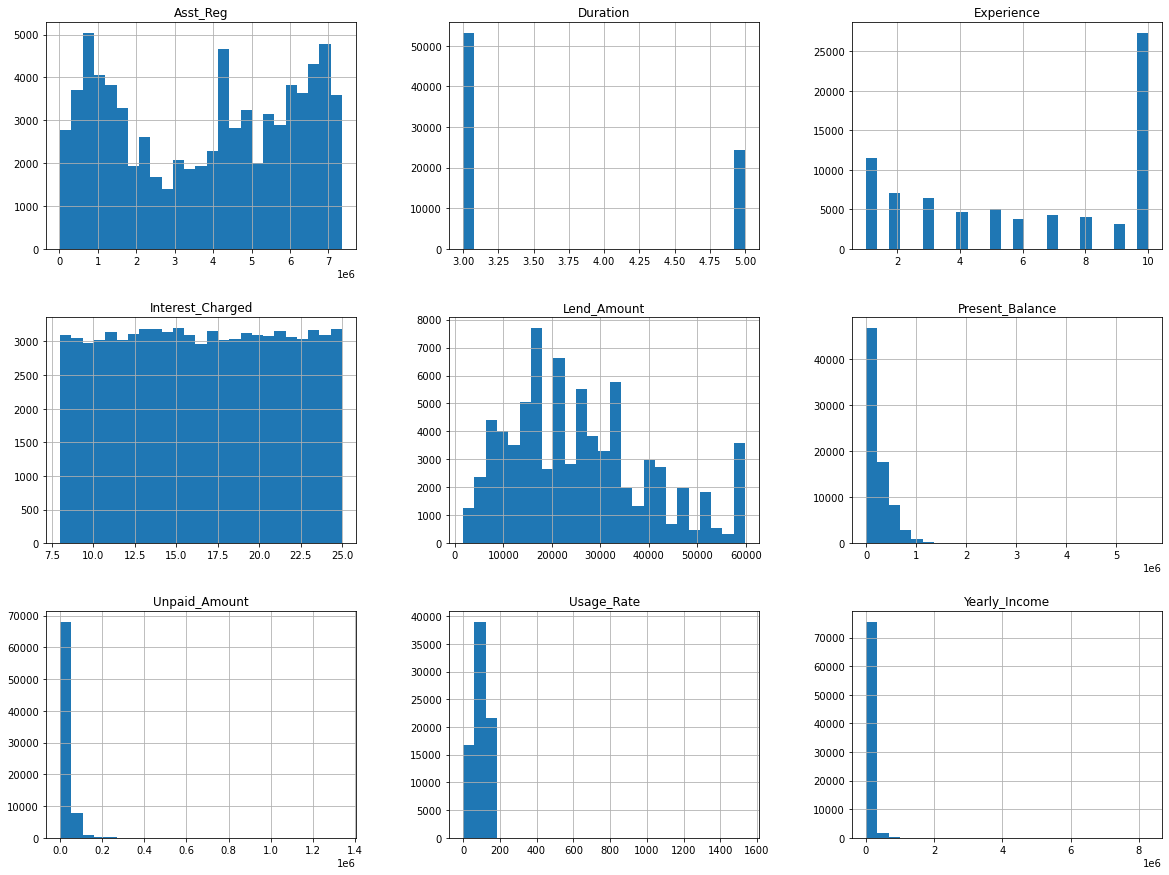

In [46]:
#plots
numcont.hist(bins=25,figsize=(20,15))
plt.show()

In [14]:
numcont.describe()

,Asst_Reg,Experience,Yearly_Income,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Duration,Unpaid_Amount
count,7.737600e+04,77376.000000,7.737600e+04,77376.000000,77376.000000,77376.000000,7.737600e+04,77376.000000,7.737600e+04
mean,3.801793e+06,6.144360,1.349915e+05,25927.213109,16.518339,95.489869,2.363786e+05,3.627197,2.953228e+04
std,2.289120e+06,3.538256,9.953162e+04,14443.738100,4.905345,40.610291,2.553444e+05,0.927917,3.757589e+04
min,2.484700e+04,1.000000,8.800000e+03,1710.000000,8.000000,0.000000,0.000000e+00,3.000000,0.000000e+00
25%,1.486830e+06,3.000000,8.330256e+04,15048.000000,12.310000,66.048000,5.181092e+04,3.000000,1.144332e+04
50%,4.133126e+06,7.000000,1.144000e+05,23940.000000,16.490000,97.008000,1.386309e+05,3.000000,2.088594e+04
75%,5.956216e+06,10.000000,1.601600e+05,34200.000000,20.772500,126.592000,3.535544e+05,5.000000,3.643497e+04
max,7.351847e+06,10.000000,8.264031e+06,59850.000000,25.000000,1534.756000,5.629234e+06,5.000000,1.338778e+06


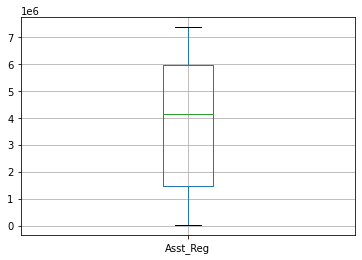

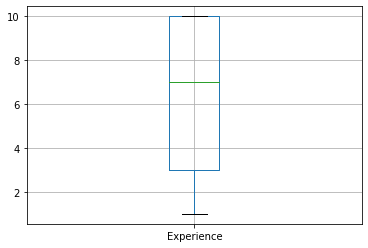

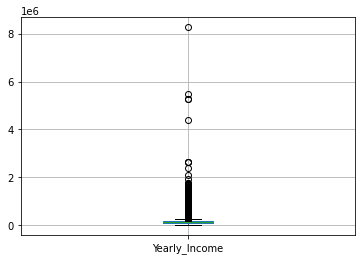

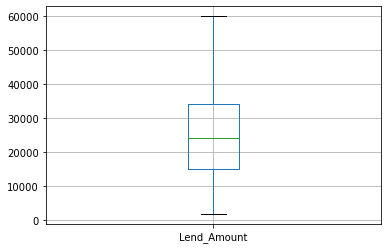

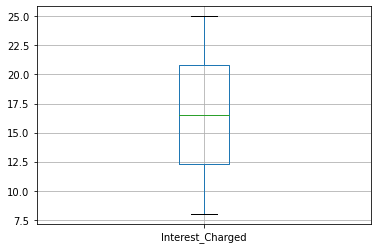

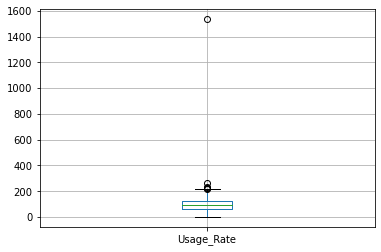

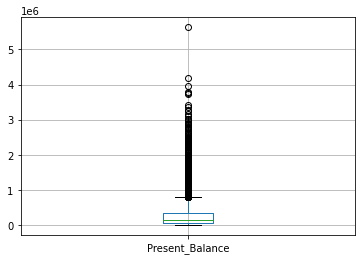

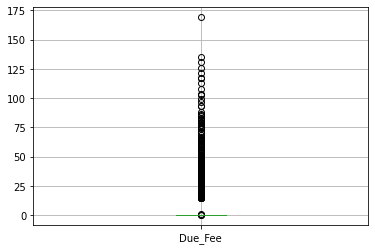

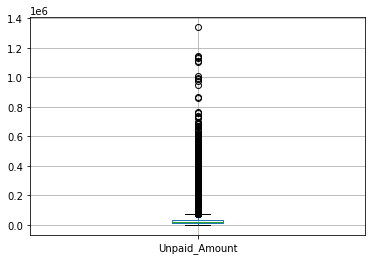

In [87]:
#df.boxplot(by ='day', column =['total_bill'], grid = False)
#realnum.boxplot(figsize=(20,15))
#plt.show()
#DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, 
#grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)

for i in numcont.columns:
    plt.figure()
    df.boxplot(column = i)

#fazer scroll na imagem, gerou todos os boxplots!

In [88]:
#criar dataframe de variaveis numericas discretas
vnumdisc=['Unpaid_2_years','Already_Defaulted','Account_Open','Duration']
numdisc=df[vnumdisc]
numdisc.head()
#TEMOS QUE TER PELO MENOS UMA VARIÁVEL ORDINAL

,Unpaid_2_years,Already_Defaulted,Account_Open,Duration
0,0,0,17,3
1,0,0,15,5
2,0,0,7,5
3,0,0,9,3
4,0,0,10,5


In [92]:
numdisc.describe()

,Unpaid_2_years,Already_Defaulted,Account_Open,Duration
count,77376.000000,77376.000000,77376.000000,77376.000000
mean,0.331873,0.005609,12.781961,3.627197
std,0.875049,0.083197,5.381400,0.927917
min,0.000000,0.000000,2.000000,3.000000
25%,0.000000,0.000000,9.000000,3.000000
50%,0.000000,0.000000,12.000000,3.000000
75%,0.000000,0.000000,16.000000,5.000000
max,18.000000,6.000000,83.000000,5.000000


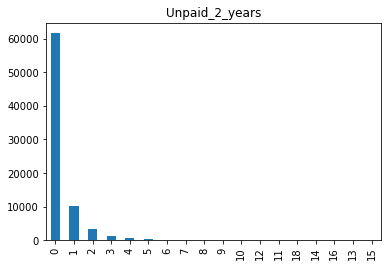

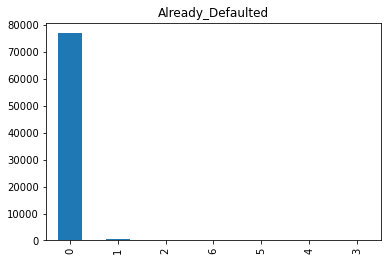

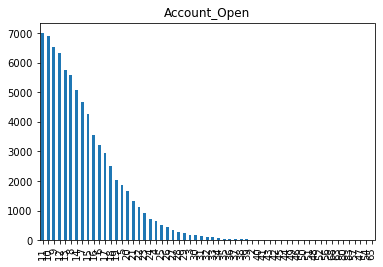

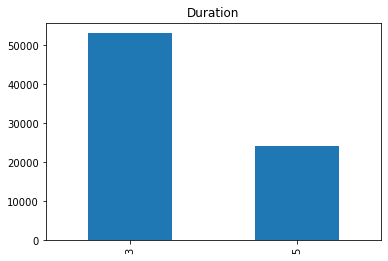

In [93]:
#histograma de tudo o que está em numdisc
for i in numdisc.columns:
    plt.figure()
    numdisc[i].value_counts().plot(kind='bar',title=i)

In [91]:
#dataframe features categoricas
vcat=['Home_Status','State','Reason','Claim_Type']
cat=df[vcat]
cat.head()

,Home_Status,State,Reason,Claim_Type
0,MORTGAGE,California,debt consolidation,I
1,RENT,NC,debt consolidation,I
2,RENT,Florida,major purchase,I
3,RENT,NewJersey,major purchase,I
4,RENT,LA,debt consolidation,I


In [66]:
cat.describe()

,Home_Status,State,Reason,Claim_Type
count,77376,77376,77376,77376
unique,5,49,13,2
top,MORTGAGE,California,debt consolidation,I
freq,39077,11194,46471,77337


MORTGAGE    39077
RENT        30853
OWN          7436
OTHER           6
NONE            4
Name: Home_Status, dtype: int64
California    11194
Newyork        6414
TX             6307
Florida        5149
IL             3091
NewJersey      2877
PA             2797
Ohio           2602
GA             2572
VA             2251
NC             2230
MI             1995
Maryland       1857
AZ             1797
MA             1764
CO             1685
WA             1627
MN             1493
IN             1276
MO             1253
TN             1184
CT             1172
NV             1039
AL              999
WI              990
OR              929
LA              908
SC              888
KY              728
KS              722
OK              676
AR              564
UT              556
NM              424
HI              423
MS              370
NH              365
WV              344
RI              337
MT              225
DC              206
DE              205
AK              198
WY              16

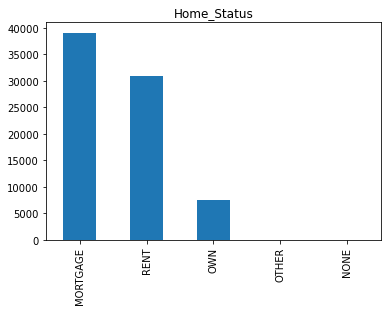

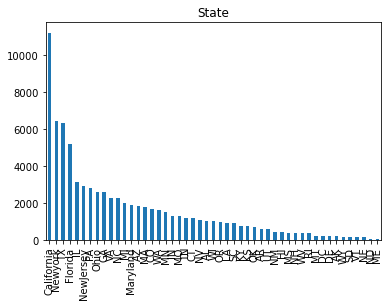

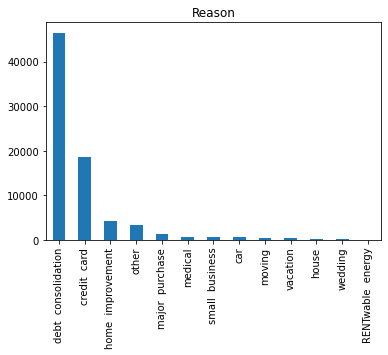

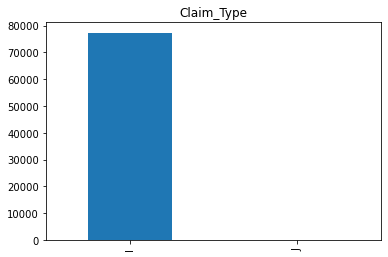

In [94]:
#fazer histograma das categoricas e value_counts (para ver se há categorias de pouca relevancia)
for i in cat.columns:
    plt.figure()
    print(cat[i].value_counts())
    cat[i].value_counts().plot(kind='bar',title=i)

0    0.810936
1    0.189064
Name: Default, dtype: float64

In [67]:
#ver correlações
#falta acrescentar label
numcont.corr()
#cuidado com a corr nas categoricas!

,Asst_Reg,Experience,Yearly_Income,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Due_Fee,Unpaid_Amount
Asst_Reg,1.000000,-0.011723,0.035239,0.037186,-0.002571,-0.074240,0.011439,-0.064270,0.032632
Experience,-0.011723,1.000000,0.065124,0.092587,-0.001331,0.035039,0.099956,-0.005956,0.086779
Yearly_Income,0.035239,0.065124,1.000000,0.377743,0.000422,0.046129,0.480897,0.010549,0.346428
Lend_Amount,0.037186,0.092587,0.377743,1.000000,-0.002254,0.114093,0.322504,0.036823,0.343429
Interest_Charged,-0.002571,-0.001331,0.000422,-0.002254,1.000000,-0.001309,-0.002172,-0.001261,0.003999
Usage_Rate,-0.074240,0.035039,0.046129,0.114093,-0.001309,1.000000,0.080116,0.024741,0.219969
Present_Balance,0.011439,0.099956,0.480897,0.322504,-0.002172,0.080116,1.000000,0.008945,0.431912
Due_Fee,-0.064270,-0.005956,0.010549,0.036823,-0.001261,0.024741,0.008945,1.000000,-0.004922
Unpaid_Amount,0.032632,0.086779,0.346428,0.343429,0.003999,0.219969,0.431912,-0.004922,1.000000


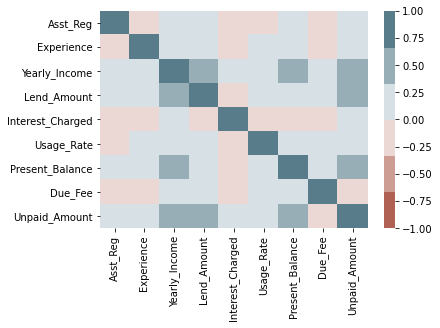

In [68]:
c=numcont.corr()
sns.heatmap(c,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,50))

In [27]:
#train_set, test_set = train_test_split(df,test_size=0.2,random_state=1)
#ver como fazer para manter a % de defaults entre train e test!

In [28]:
#pipeline
class NewAttributes(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        test=X[:,2]/X[:,3]

In [29]:
#Análise das features
df['Experience'].value_counts()

10    27298
1     11526
2      7133
3      6474
5      4997
4      4693
7      4233
8      4080
6      3758
9      3184
Name: Experience, dtype: int64

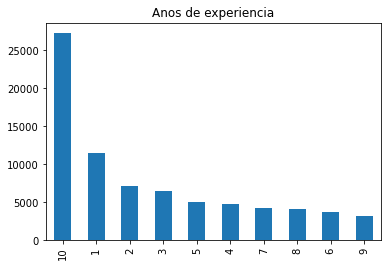

In [30]:
#adicionar dataframe com o valor de values_count das variavei ordinais
#Identificar os o número de pessoas por idade de experiencian
degree_experience_counts=df['Experience'].value_counts()
degree_experience_counts
degree_experience_counts.plot(kind='bar');
plt.title('Anos de experiencia');
#adicionar verificação nas colunas de datatype object se não é para ser númerico

In [31]:

#adicionar dataframe com dados ordinais e categoricos com countable
#DATA FRAME COM VARIÁVEIS CONTINUAS
df.columns
countable=df[['Home_Status','File_Status','State','Reason','Claim_Type']]
countable


,Home_Status,File_Status,State,Reason,Claim_Type
0,MORTGAGE,fully paid,California,debt consolidation,I
1,RENT,whole,NC,debt consolidation,I
2,RENT,whole,Florida,major purchase,I
3,RENT,fully paid,NewJersey,major purchase,I
4,RENT,fully paid,LA,debt consolidation,I
...,...,...,...,...,...
87494,RENT,fully paid,Newyork,small business,I
87495,RENT,whole,MI,debt consolidation,I
87496,RENT,whole,MA,debt consolidation,I
87497,MORTGAGE,fully paid,CT,debt consolidation,I


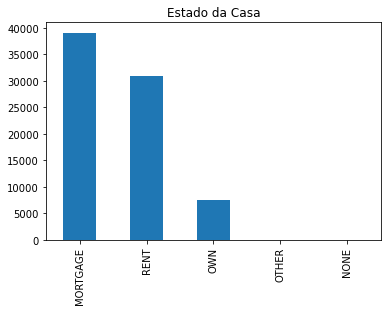

In [134]:
#
home_counts=df['Home_Status'].value_counts()
home_counts.plot(kind='bar');
plt.title('Estado da Casa');


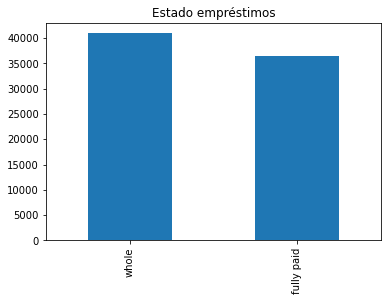

In [135]:
#Emprestimos pagos e não pagas
file_counts=df['File_Status'].value_counts()
file_counts.plot(kind='bar');
plt.title('Estado empréstimos');

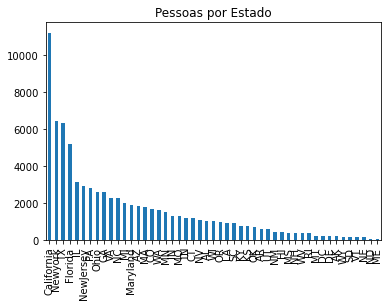

In [136]:
#Pessoas por Estado
state_counts=df['State'].value_counts()
state_counts.plot(kind='bar');
plt.title('Pessoas por Estado');

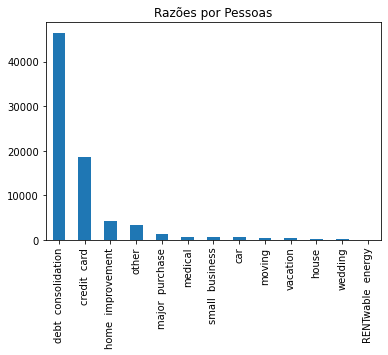

In [137]:
#Razões por Pessoas
reason_counts=df['Reason'].value_counts()
reason_counts.plot(kind='bar');
plt.title('Razões por Pessoas');

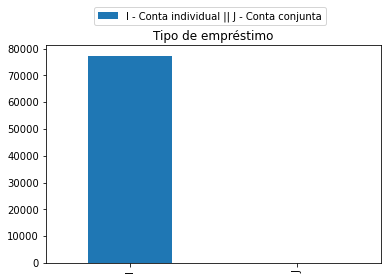

In [138]:
#Tipo de empréstimo
claim_counts=df['Claim_Type'].value_counts()
claim_counts.plot(kind='bar', label='Model length');
plt.legend(['I - Conta individual || J - Conta conjunta'],bbox_to_anchor =(0.85, 1.20))
plt.title('Tipo de empréstimo');

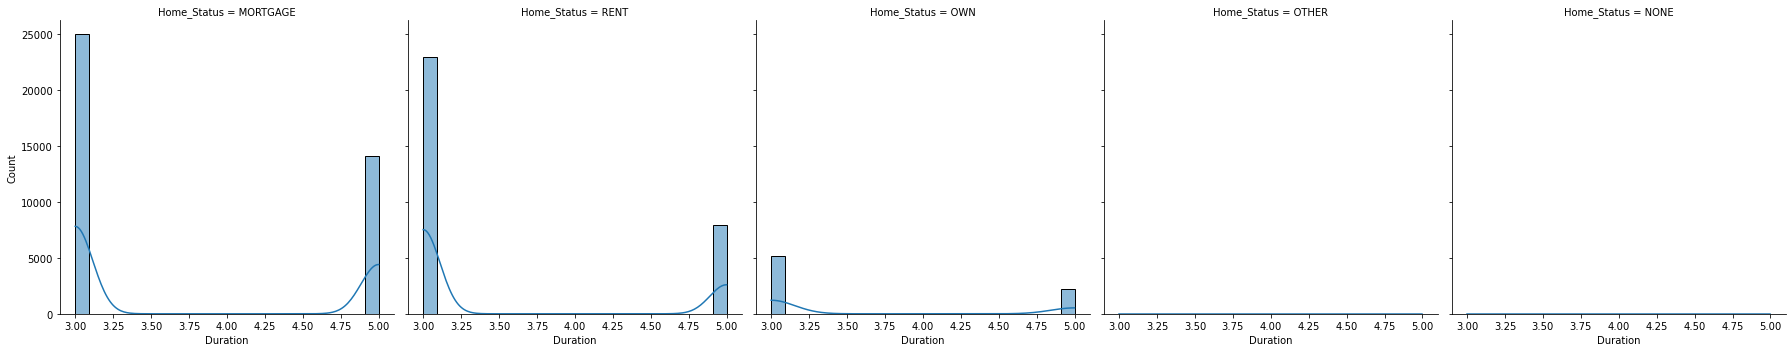

In [139]:
sns.displot(data=df,x="Duration",col="Home_Status",kde=True)

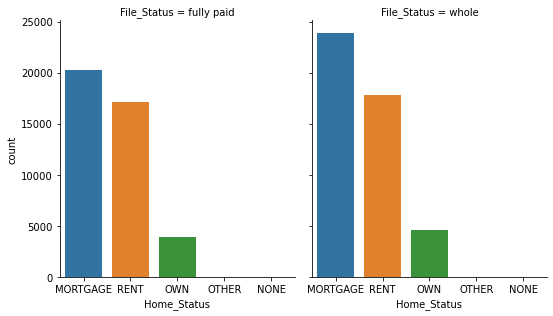

In [112]:

g = sns.catplot(x="Home_Status", col="File_Status", col_wrap=8, 
                data=countable, 
                kind="count", height=4.5, aspect=.8)

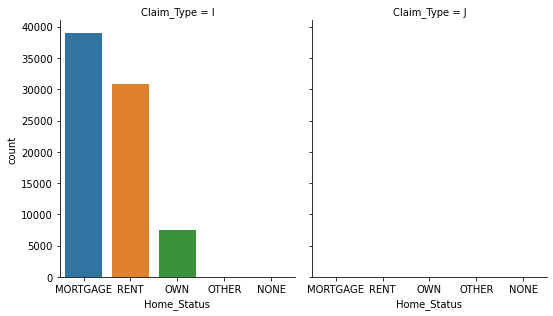

In [141]:

g = sns.catplot(x="Home_Status", col="Claim_Type", col_wrap=8, 
                data=countable, 
                kind="count", height=4.5, aspect=.8)